# Graphs in NetworkX

Creating, manipulating, drawing and saving graphs in the python package [NetworkX](http://networkx.github.io/).

For the project on depencency parsing, NLP1.

(I believe that NetworkX is included in the Anaconda distribution. Otherwise it's probably a quick pip install)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
import itertools
from networkx.algorithms.tree.branchings import Edmonds

labels = ["nsubj", "dobj", "iobj", "det", "nmod", "amod", "cc", "conj"]
sent = "This is a test sentence".split()

def matrix_to_graph(A, sent, labels, digraph=False):
    """
    Turns a numpy 
    """
    k = A.shape[0]
    nodes = range(k)
    if digraph:
        # This function turns a np matrix into a directed graph
        G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
        # Trying to get labels on the arcs... No succes yet
        labels = {(i, j, A[i,j]): np.random.choice(labels) for i,j in itertools.product(nodes, nodes)}
    else:
        G = nx.from_numpy_matrix(A)
        
    for k, w in enumerate(sent):
        G.node[k]['word'] = w
        
    weighted_edges = {(i, j): A[i,j] for i,j in itertools.product(nodes, nodes)}
    return G, weighted_edges

def minimum_tree(G):
    edmonds = Edmonds(G)
    tree = edmonds.find_optimum()
    return tree

Turn a random (square!) numpy array into a weighted undirected graph (`nx.Graph`) or weighted directed graph (`nx.DiGraph`):

[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]
G has 12 edges
[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
digraph-G has 25 edges


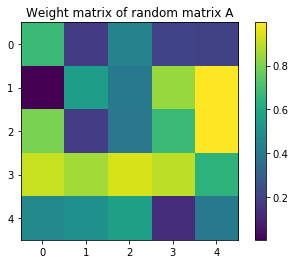

In [49]:
A = np.random.random((5,5))
diG, edges = matrix_to_graph(A, sent, labels, digraph=True)
G, _ = matrix_to_graph(A, sent, labels, digraph=False)

print(G.nodes)
print(G.edges)
print("G has {} edges".format(len(G.edges)))
print(diG.nodes)
print(diG.edges)
print("digraph-G has {} edges".format(len(diG.edges)))

plt.imshow(A)
plt.colorbar()
plt.title("Weight matrix of random matrix A")
plt.show()

# words = nx.get_node_attributes(G,'word')
# print(words)
# labels = nx.get_edge_attributes(G,'key')
# print(labels)

Draw the graph with `nx.draw` and customize layout:

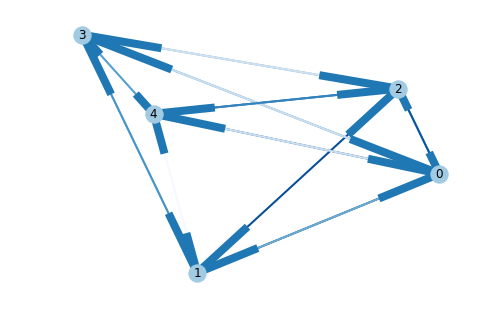

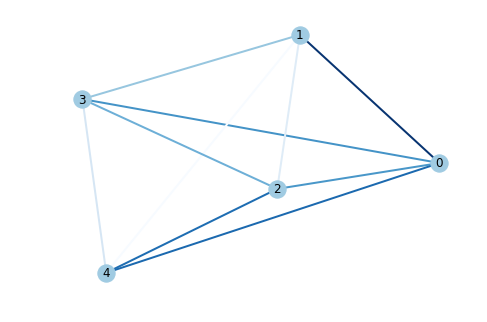

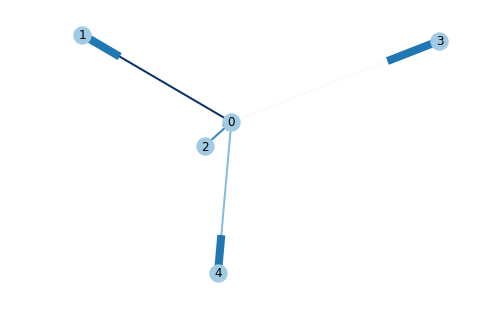

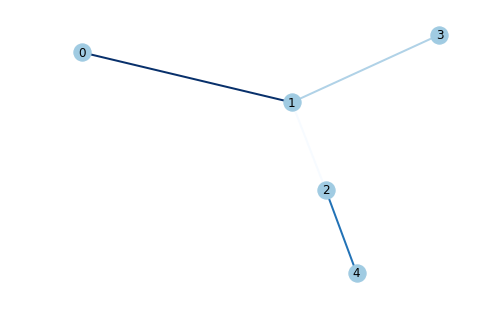

In [36]:
def draw_nice(G, colors):
    nx.draw(G, node_color='#A0CBE2', edge_color=colors,
            width=2, edge_cmap=plt.cm.Blues, with_labels=True)
    plt.show()

colors = [edges[(i,j)] for (i,j) in G.edges()]
dicolors = [edges[(i,j)] for (i,j) in diG.edges()]

draw_nice(diG, dicolors)
draw_nice(G, colors)

tree = minimum_tree(diG)
colors = [edges[(i,j)] for (i,j) in tree.edges()]
draw_nice(tree, colors)

tree = minimum_tree(G)
colors = [edges[(i,j)] for (i,j) in tree.edges()]
draw_nice(tree, colors)

Write a graph to an xml file type. Can be used to visualize the graph in another program. I found that [Cytoscape](http://www.cytoscape.org/?gclid=EAIaIQobChMItNHysrG81wIViEAbCh1HCQ7jEAAYASAAEgJrgfD_BwE) worked quite well for this purpose.

In [39]:
A = np.random.random((5,5))
# G, edges = matrix_to_graph(A, sent, labels, digraph=True)
G = nx.from_numpy_matrix(A)

nx.write_graphml(G, "full.xml")
nx.write_graphml(tree, "mst.xml")